# Wrangle and Analyze Data Project:
> We will be working on data from three different sources in order to Gather it in one dataframe, clean its quality and tidiness and analyze it to extract information. This process will be divided into three steps: 
- Gathering Data
- Assesing Data 
- Analyzing and Visualizing Data

In [1]:
# First import libraries and packages needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import json 

# Gathering Data 

In [2]:
# To collect data required - import WeRateDogs Twitter archive: 
twitter_Archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_Archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# Then download tweet image predictions programmatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
# Read TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [5]:
# Import data from tweet json ...............
twt_id = []
faves = []
rts = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            twt_id.append(tweet_data['id'])
            faves.append(tweet_data['favorite_count'])
            rts.append(tweet_data['retweet_count'])
            
additional_tweet_data = pd.DataFrame({'tweet_id':twt_id, 'favorite_count':faves, 'retweet_count':rts})

In [6]:
additional_tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assesing Data

### Twitter Arcive:

In [7]:
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_Archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [11]:
twitter_Archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
twitter_Archive.text.value_counts()

This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa        1
Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o    1
This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm                                                                       1
Breathtaking pupper here. Should be on the cover of Dogue. Top-notch tongue. Appears considerably fluffy. 12/10 https://t.co/Eeh3yfdglS                                   1
WeRateDogs stickers are here and they're 12/10! Use code "puppers" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r                            1
This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ 

In [13]:
twitter_Archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [14]:
twitter_Archive.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [ ]:
twitter_Archive.retweeted_status_timestamp.value_counts()

In [15]:
twitter_Archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_Archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_Archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Buddy          7
an             7
Bailey         7
Rusty          6
Milo           6
Leo            6
Stanley        6
Bella          6
Jax            6
Dave           6
Scout          6
Koda           6
Oscar          6
Jack           6
Gus            5
            ... 
Joshwa         1
Flurpson       1
Clarq          1
Karma          1
Skittle        1
Wafer          1
Doobert        1
Grey           1
Pete           1
Adele          1
Ralphé         1
Pupcasso       1
Tebow          1
Kial           1
Chloe          1
Billl          1
Ember          1
Dobby          1
Georgie        1
Eugene         1
Ulysses        1
Fiji           1
Gin            1
Petrick        1
Kane           1
Pinot          1
Simba          1
Chef          

In [18]:
twitter_Archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
twitter_Archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
twitter_Archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
twitter_Archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Additonal Tweet Data

In [24]:
additional_tweet_data.sample(5)

,tweet_id,favorite_count,retweet_count
847,766008592277377025,4149,571
1889,674764817387900928,852,263
755,778650543019483137,6430,1729
415,822610361945911296,16327,3423
285,838831947270979586,0,12643


In [25]:
additional_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
additional_tweet_data.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [27]:
additional_tweet_data.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [28]:
additional_tweet_data.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

### Image Predictions

In [29]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True
1183,738537504001953792,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,chow,0.808737,True,gibbon,0.028942,False,Pembroke,0.026498,True
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [31]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg                                            2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                       

In [32]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [33]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [34]:
image_predictions.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [37]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [38]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [39]:
image_predictions.p2_conf.value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [40]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [41]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [42]:
image_predictions.p3_conf.value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
0.077130    2
0.116806    2
0.146427    2
0.003956    2
0.039012    2
0.137186    2
0.109677    2
0.096435    2
0.157028    2
0.157524    2
0.118199    2
0.016497    2
0.100842    2
0.151024    2
0.005410    2
0.026364    2
0.186789    2
0.223263    2
0.087355    2
0.121523    2
0.041476    2
0.071436    2
0.046403    2
0.014858    2
0.003330    2
           ..
0.098207    1
0.013206    1
0.106014    1
0.044002    1
0.127037    1
0.001404    1
0.001274    1
0.008451    1
0.039808    1
0.056548    1
0.001310    1
0.016663    1
0.079883    1
0.122701    1
0.047397    1
0.068297    1
0.031673    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.143328    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [44]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#  Cleaning Data

We will be solving 10 of the folowing issues, inclusing 8 quality issues and 2 tidiness issues:

#### Tidiness Issues

> - Data should be grouped in one table 
> - 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

#### Quality issues 


> - Incorrect datatypes for columns: tweet_id (should be string), rating_numerator and rating_denominator (both should be float) 
> - Incorrect names in 'name' column (such, a, quite, one...etc)
> - Change 'timestamp' to be 'datetime' instead of 'object' 
> - Delete column that are unnecessary in our analysis 
> - Image_prediction contains duplicated 'jpg_url' values
> - Name values contains string "None" instead of NaN
> - Remove tweet that has been retweeted since its not original tweets
>- Make rating standardized by dividing numerator by the denominator and save it in a new column

 Before we start cleaning we should make a copy of the tables we have in case we need the original tables 

In [45]:
twitter_Archive_Clean = twitter_Archive.copy()
image_predictions_Clean = image_predictions.copy()
additional_tweet_data_Clean = additional_tweet_data.copy()

## Tidiness Issues Cleaning

### Define Issue 1
> Data should be grouped in one table

### Code 

In [46]:
twitter_Archive_Clean = pd.merge(left=twitter_Archive_Clean,
                                 right=additional_tweet_data_Clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [47]:
twitter_Archive_Clean  = twitter_Archive_Clean.merge(image_predictions_Clean, on='tweet_id', how='inner')

### Test

In [48]:
twitter_Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorite_count                2073 

### Define Issue 2
> 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

### Code 

In [49]:
twitter_Archive_Clean['dog_stage'] = twitter_Archive_Clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [50]:
twitter_Archive_Clean = twitter_Archive_Clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [51]:
twitter_Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non

## Quality Issues 

### Define Issue 1
> Incorrect datatypes for columns: tweet_id (should be string), rating_numerator and rating_denominator (both should be float) 

### Code

In [52]:
twitter_Archive_Clean['tweet_id'] = twitter_Archive_Clean['tweet_id'].astype(str)
twitter_Archive_Clean['rating_numerator'] = twitter_Archive_Clean['rating_numerator'].astype(float)
twitter_Archive_Clean['rating_denominator'] = twitter_Archive_Clean['rating_denominator'].astype(float)

### Test

In [53]:
twitter_Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null float64
rating_denominator            2073 non-null float64
name                          2073 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            207

### Define Issue 2
> Incorrect names in 'name' column (such, a, quite, one...etc)

### Code

In [54]:
# first we collect invalid names form column 'name' and store them 
invalid_Names = []
for i in twitter_Archive_Clean['name']:
    if i[0].islower() and i not in invalid_Names:
        invalid_Names.append(i)
print(invalid_Names)

['such', 'a', 'quite', 'one', 'incredibly', 'an', 'very', 'just', 'my', 'not', 'his', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [55]:
# replace values equals to invalid names with NaN
twitter_Archive_Clean['name'].replace(invalid_Names, np.nan, inplace = True)

### Test

In [56]:
twitter_Archive_Clean['name'].value_counts()

None        577
Charlie      11
Tucker       10
Cooper       10
Penny        10
Oliver       10
Lucy         10
Bo            8
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Stanley       6
Milo          6
Jax           6
Bella         6
Rusty         6
Bailey        6
Scout         6
Koda          6
Dave          6
Buddy         5
Leo           5
Alfie         5
Larry         5
Oscar         5
Louis         5
Chester       5
Bruce         4
           ... 
Lizzie        1
Chuq          1
Blanket       1
Filup         1
Jaspers       1
Pinot         1
Petrick       1
Mauve         1
Ralphé        1
Arnold        1
Brandi        1
Berkeley      1
Tedrick       1
Chadrick      1
Binky         1
Malikai       1
Dutch         1
Adele         1
Pupcasso      1
Kingsley      1
Tebow         1
Kial          1
Chloe         1
Billl         1
Dobby         1
Pete          1
Georgie       1
Ulysses       1
Fiji          1
Biden         1
Name: name, Length: 914,

### Define Issue 3 
> Change 'timestamp' to be 'datetime' instead of 'object' 

### Code

In [57]:
twitter_Archive_Clean['timestamp'] = pd.to_datetime(twitter_Archive_Clean['timestamp'])

### Test

In [58]:
twitter_Archive_Clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
favorite_count                         int64
retweet_count                          int64
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog    

### Define Issue 4 
> Delete column that are unnecessary  in our analysis 

### Code

In [59]:
twitter_Archive_Clean.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

### Test

In [60]:
twitter_Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2073 non-null object
timestamp                     2073 non-null datetime64[ns]
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null float64
rating_denominator            2073 non-null float64
name                          1973 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 non-null bool
p2                            2073 non-null object
p2_conf                

### Define Issue 5
> Image_prediction contains duplicated 'jpg_url' values

### Code 

In [61]:
image_predictions_Clean['jpg_url'].duplicated().sum()

66

In [62]:
# Delete duplicates here
image_predictions_Clean = image_predictions_Clean.drop_duplicates('jpg_url', keep='last')

### Test

In [63]:
image_predictions_Clean['jpg_url'].duplicated().sum()

0

### Define Issue 6 
>  Name values contains string "None" instead of NaN

### Code

In [64]:
twitter_Archive_Clean['name'].value_counts()

None        577
Charlie      11
Tucker       10
Cooper       10
Penny        10
Oliver       10
Lucy         10
Bo            8
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Stanley       6
Milo          6
Jax           6
Bella         6
Rusty         6
Bailey        6
Scout         6
Koda          6
Dave          6
Buddy         5
Leo           5
Alfie         5
Larry         5
Oscar         5
Louis         5
Chester       5
Bruce         4
           ... 
Lizzie        1
Chuq          1
Blanket       1
Filup         1
Jaspers       1
Pinot         1
Petrick       1
Mauve         1
Ralphé        1
Arnold        1
Brandi        1
Berkeley      1
Tedrick       1
Chadrick      1
Binky         1
Malikai       1
Dutch         1
Adele         1
Pupcasso      1
Kingsley      1
Tebow         1
Kial          1
Chloe         1
Billl         1
Dobby         1
Pete          1
Georgie       1
Ulysses       1
Fiji          1
Biden         1
Name: name, Length: 914,

In [65]:
# Replace all 'None's with a NaN
twitter_Archive_Clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

### Test

In [66]:
twitter_Archive_Clean['name'][twitter_Archive_Clean['name'] == 'None'].sum()

0

### Define Issue 7
> Remove tweet that has been retweeted since its not original tweets

### Code 

In [67]:
# Checking how many tweets are actually retweet by checking status in retweeted_status column.
twitter_Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2073 non-null object
timestamp                     2073 non-null datetime64[ns]
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null float64
rating_denominator            2073 non-null float64
name                          1396 non-null object
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
jpg_url                       2073 non-null object
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 non-null bool
p2                            2073 non-null object
p2_conf                

In [68]:
twitter_Archive_Clean.drop(twitter_Archive_Clean[twitter_Archive_Clean['retweeted_status_id'].notnull()== True].index, inplace= True)


In [69]:
#Dropping  columns with retweet infomation
twitter_Archive_Clean.drop(['retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'], axis= 1 , inplace= True)

### Test

In [70]:
twitter_Archive_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1350 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
dog_stage             326 non-null object
dtypes: bool(3), datetime64[n

### Define Issue 8
> Make rating standardized by dividing numerator by the denominator and save it in a new column

### Code

In [71]:
twitter_Archive_Clean['rating'] = twitter_Archive_Clean['rating_numerator'] / twitter_Archive_Clean['rating_denominator']

### Test

In [72]:
twitter_Archive_Clean.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


# Storing Dataframe

In [73]:
#Store the clean DataFrame in a CSV file
twitter_Archive_Clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

# Analyze and Visualize

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


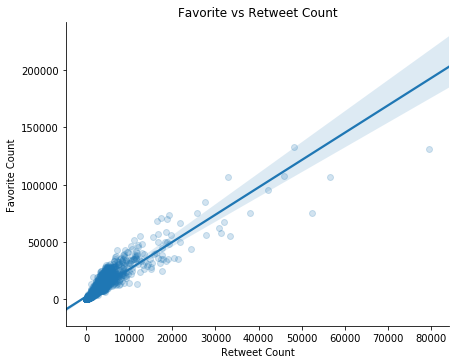

In [74]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", y="favorite_count", data=twitter_Archive_Clean,
           size = 5, aspect=1.3, scatter_kws={'alpha':1/5})
plt.title('Favorite vs Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.

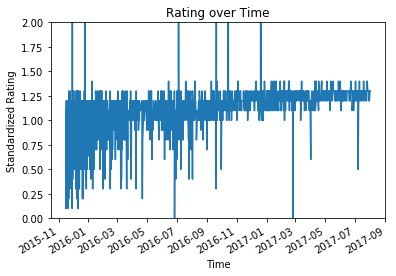

In [78]:
# Plot standardized ratings over time with ylim of 0-2
twitter_Archive_Clean.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

Indeed it appears that overtime the frequency of ratings below 1 decreases. Before 2016-11 there were a lot of ratings below 1, while after that time there are very few.

In [80]:
# How many dogs we have from each type in our dataset
twitter_Archive_Clean.dog_stage.value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

Over more than half of the dogs in our dataset are of the type pupper, however we have only 3 of type floofer